### 50_startups data => Predict the profit based on three input variables

**x1 => R&D spend**

**x2 => Administration spend**

**x3 => Marketing spend**

##### y  => Profit (Output variable)

### 1. Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

### 2. Importing dataset

In [2]:
st_data = pd.read_csv('50_Startups.csv')
st_data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


### 3. Initial Data Analysis

In [3]:
st_data.shape   # To get the total no. of rows and columns

(50, 5)

In [4]:
st_data.isna().sum()   # To check for null values

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
st_data.dtypes  # To get the datatypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [6]:
st_data.head(6)   # To get the data of first 6 columns to check for any discrepancy

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12


In [7]:
st_data.describe()      # describe -> to get a summary of statistics with respect to df columns

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
st_data.info()   # info -> to get a concise summary of the df column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [9]:
st_data = st_data.rename(columns ={'R&D Spend':'rd','Administration':'ad','Marketing Spend':'ms'}, inplace =False)
st_data.head()                     
                                                          # Renaming of column headings to meaningful short names

,rd,ad,ms,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### 4. Data Visualization 

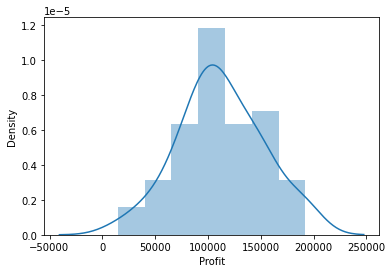

In [10]:
sns.distplot(st_data['Profit'])                # To check for normal distribution
plt.show()

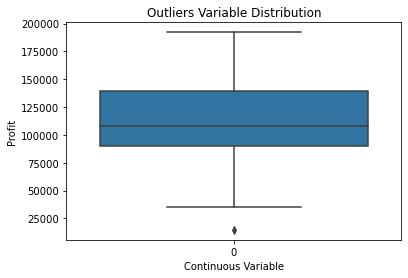

In [11]:
sns.boxplot(data= st_data['Profit'], width= 0.8)        # Outliers detected                                                           
plt.title("Outliers Variable Distribution")
plt.ylabel("Profit")
plt.xlabel("Continuous Variable")
plt.show()

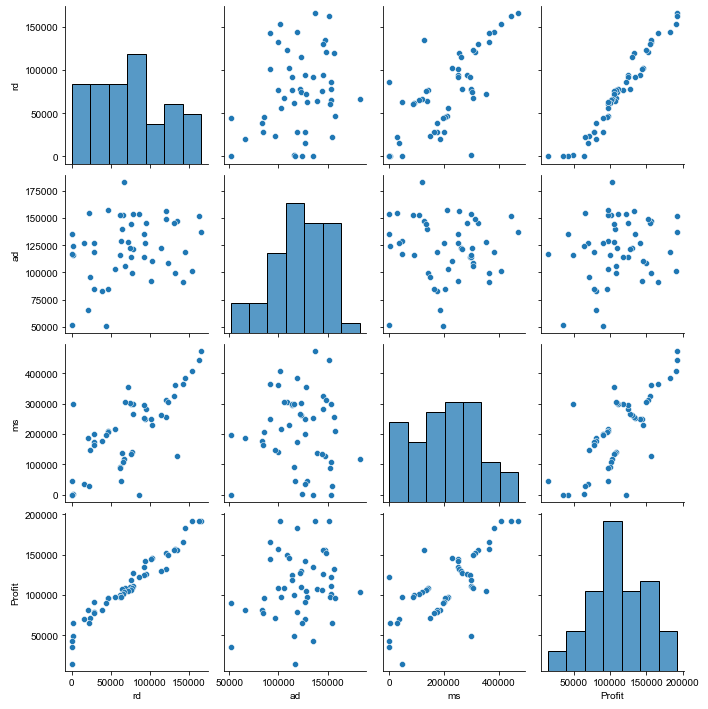

In [12]:
sns.pairplot(st_data)              # To check the association between the variables
sns.set_style('darkgrid')
plt.show()

**From the pairplot we get the following conclusions:-**
- Research and development (R&D) are directly proportional to the investment that we can do.                                  
- Marketing spend seems to be directly proportional with the profit though there are a little bit of outliers in the data.    
- There is no relationship between Administration and profit i.e. our target variable.*

#### Correlation Analysis

In [13]:
st_corr = st_data.corr()   
st_corr

,rd,ad,ms,Profit
rd,1.000000,0.241955,0.724248,0.972900
ad,0.241955,1.000000,-0.032154,0.200717
ms,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


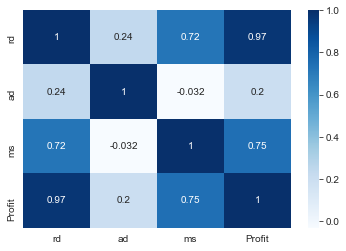

In [14]:
sns.heatmap(st_corr, annot=True, cmap='Blues')
plt.show()

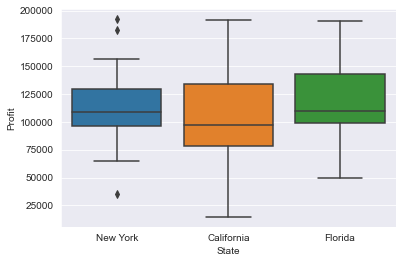

In [15]:
sns.boxplot(x = 'State', y = 'Profit', data = st_data)   # State-wise outlier detection with respect to Profit
plt.show()

### 5. Model Building 

#### Splitting the dataset into Independent and Dependent variable

In [16]:
X = st_data.iloc[:, [0,1,2,3]].values 
y = st_data.iloc[:, 4].values

#### Solving the dummy variable trap

In [17]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()
X[:, 3] = label_encoder.fit_transform(X[:, 3])

### 6. Model Training 

#####  Splitting the dataset into training and testing data 

In [18]:
from sklearn.model_selection import train_test_split     
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8, test_size= 0.2, random_state= 42)

In [19]:
from sklearn.linear_model import LinearRegression 
mlr_model = LinearRegression() 
mlr_model.fit(X_train,y_train)

LinearRegression()

### 7. Model Testing

In [20]:
y_pred = mlr_model.predict(X_test)

### 8. Model Evaluation 

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
r_squared = r2_score(y_test, y_pred)                    # To evaluate the performance of Multiple linear regression model
r_squared

0.9000614254946405

In [23]:
print('R2 score by mlr : ',round(r_squared, 3))         # r2_score => R2 score (or) Coefficient of Determination

R2 score by mlr :  0.9


##### Conclusion :-
**It can be referred that 90% of the changeability of the dependent output variable can be explained by the model while the remaining 10% of the variability is still unaccounted for.**

In [24]:
mse_mlr = mean_squared_error(y_test,y_pred)      # mse => Mean squared error 
mse_mlr

80929465.49097763

In [25]:
print('Mean squared error by mlr : ',round(mse_mlr,3))    # To see how close a regression line is to a set of datapoints.

Mean squared error by mlr :  80929465.491


------------------------------------------------------------------------------------------------------------------------------------------------

###  Alternative model:-  Using statsmodel to improve the model

In [26]:
import statsmodels.formula.api as smf                            # Importing necessary model
X = np.append(arr=np.ones((50,5)).astype(int), values=X, axis=1) 
X_pred = X[:, [0, 1, 2, 3, 4, 5]]

In [27]:
ols_reg = smf.ols('Profit~rd+ad+ms',st_data).fit()              # Fitting the parameters to ols regressor

In [28]:
ols_reg.summary()      # To check the summary for statistical values for data analysis

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 04 Apr 2022   Prob (F-statistic):           4.53e-30
Time:                        11:18:31   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
rd             0.8057      0.045     17.846      0.000       0.715       0.897
ad            -0.0268      0.051     -0.526      0.602      -0.130       0.076
ms             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Hypothesis Formulation:

- H0 : It is not a significant parameter.
- Ha : It is a significant parameter.

#### If p_value < 0.05, then there is a good association between the input and output variables and we reject the null hypothesis. 

#### The variables with P > |t| i.e. p-value less than 0.05 will be considered to fit the model and the other parameters will be rejected to get an accurate model.

*For ad = Administration & ms = Marketing spend, since p-value is greater than 0.05, we will drop the two parameters and try to fit the model again.* 

In [29]:
ols_reg = smf.ols('Profit~rd', st_data)  # After removing the variables with high p-value, i.e. ad & ms

##### Splitting the dataset into the Training set and Test set

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_pred, y, train_size = 0.8, test_size = 0.2, random_state = 42)

In [31]:
mlr_model_2 = LinearRegression()    # Fitting Multiple Linear Regression to the trained model_2 
mlr_model_2.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = mlr_model_2.predict(X_test)   # Predicting the result of test data

##### R2 score by smf model = 0.95 
- The r2 score value increased when we used ols regressor to fit to the Multiple Linear regression model.
- A higher value of R2 is desirable as it indicates better results.
- So we can conclude that by using the ols regressor we have improved to get a desirable model.

In [33]:
mse_smf = mean_squared_error(y_test,y_pred)   # mse => Mean squared error by smf 
mse_smf

59510962.80788003

In [34]:
print('Mean Squared Error by smf : ',round(mse_smf,3))  

Mean Squared Error by smf :  59510962.808


##### Conclusion :-

- The smaller the Mean Squared Error, the closer we are to finding the line of best fit.
- The mean squared error has reduced to some extent after using the ols regressor to get the best model with good accuracy.

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------** 